In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'archive/pisa2009train.csv'
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: 'archive/pisa2009train.csv'

### 1. Data Exploration and Cleaning
- **Check for missing values**: Identify which variables have NA values and decide how to handle them (imputation, removal, etc.)

- **Examine variable distributions**: Look at histograms/boxplots for numeric variables and frequency tables for categorical ones

- **Check for outliers**: Especially in the readingScore and schoolSize variables

In [ ]:
df.head(5)

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [ ]:
df.shape

(3663, 24)

In [ ]:
df['nullValuesCount'] = df.isnull().sum(axis=1)

In [ ]:
df = df[df['nullValuesCount'] == 0]

In [ ]:
df.drop(columns=['nullValuesCount'], inplace=True)

In [ ]:
df.shape

(2414, 24)

In [ ]:
df.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 2414 entries, 1 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  2414 non-null   int64  
 1   male                   2414 non-null   int64  
 2   raceeth                2414 non-null   object 
 3   preschool              2414 non-null   float64
 4   expectBachelors        2414 non-null   float64
 5   motherHS               2414 non-null   float64
 6   motherBachelors        2414 non-null   float64
 7   motherWork             2414 non-null   float64
 8   fatherHS               2414 non-null   float64
 9   fatherBachelors        2414 non-null   float64
 10  fatherWork             2414 non-null   float64
 11  selfBornUS             2414 non-null   float64
 12  motherBornUS           2414 non-null   float64
 13  fatherBornUS           2414 non-null   float64
 14  englishAtHome          2414 non-null   float64
 15  computerF

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
9,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90


In [ ]:
# Storing True/False Columns in one variable for better readability
bool_cols = df[['male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay', 'schoolHasLibrary', 'publicSchool', 'urban']].columns
bool_cols

Index(['male', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors',
       'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
       'motherBornUS', 'fatherBornUS', 'englishAtHome',
       'computerForSchoolwork', 'read30MinsADay', 'schoolHasLibrary',
       'publicSchool', 'urban'],
      dtype='object')

In [ ]:
df[bool_cols].describe()

,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,schoolHasLibrary,publicSchool,urban
count,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,0.501243,0.727423,0.834300,0.896023,0.363712,0.735708,0.874068,0.348384,0.857084,0.936205,0.789975,0.785418,0.881524,0.915493,0.301574,0.971417,0.917564,0.362883
std,0.500102,0.445377,0.371888,0.305294,0.481167,0.441047,0.331842,0.476557,0.350060,0.244437,0.407410,0.410617,0.323237,0.278204,0.459036,0.166667,0.275084,0.480931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

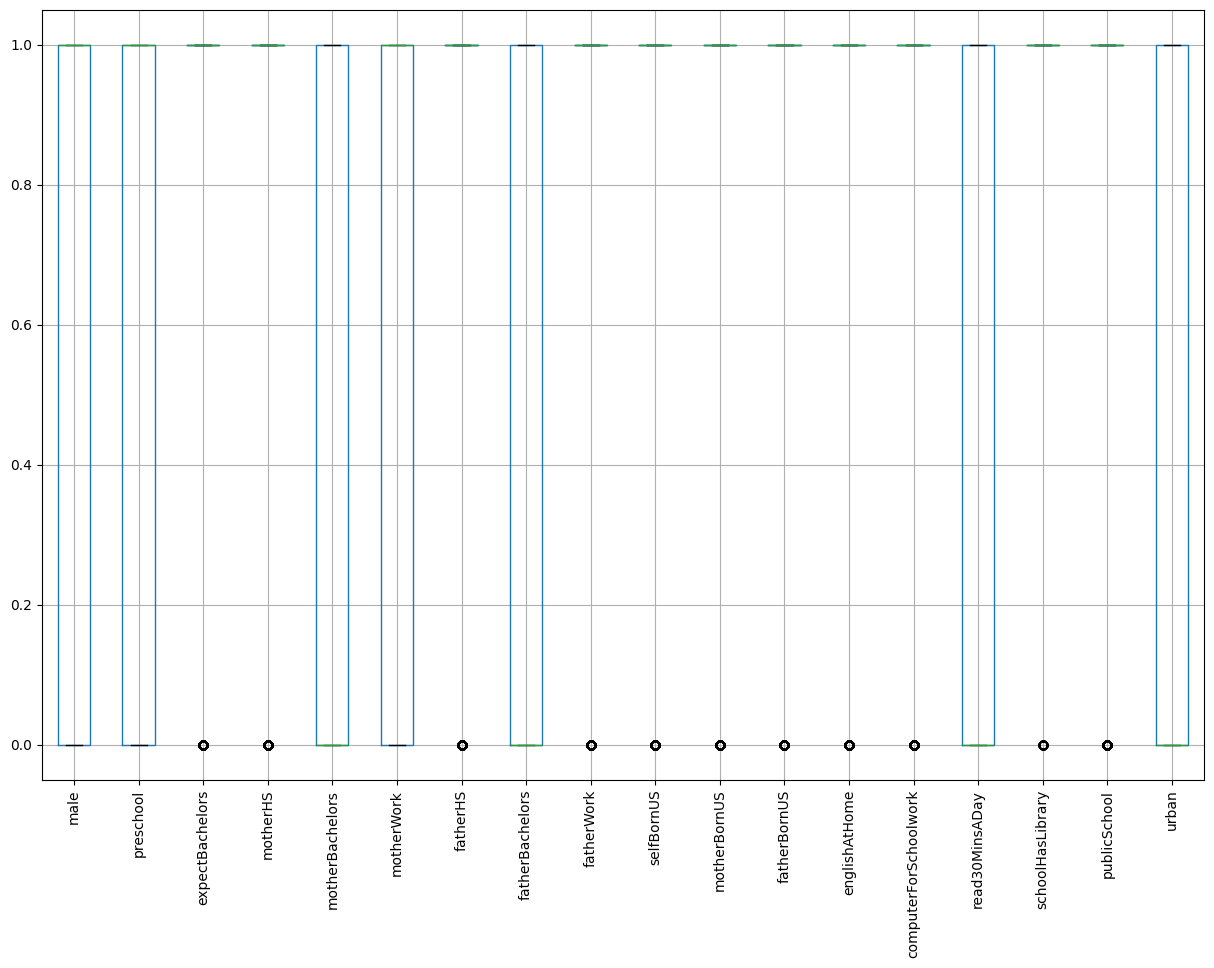

In [ ]:
df[bool_cols].boxplot(figsize=(15, 10), rot=90)

In [ ]:
table_insights = pd.DataFrame(df[bool_cols].sum())
table_insights.rename(columns={0: 'True Sum'}, inplace=True)
table_insights['False Sum'] = (df[bool_cols].count() - df[bool_cols].sum()).values
table_insights['Total'] = table_insights['True Sum'] + table_insights['False Sum']
table_insights.reset_index(inplace=True)
table_insights.rename(columns={'index': 'Column Name'}, inplace=True)

table_insights['True Perc'] = round((table_insights['True Sum'] / table_insights['Total']) * 100, 2)
table_insights['False Perc'] = round((table_insights['False Sum'] / table_insights['Total']) * 100, 2)

table_insights

,Column Name,True Sum,False Sum,Total,True Perc,False Perc
0,male,1210.0,1204.0,2414.0,50.12,49.88
1,preschool,1756.0,658.0,2414.0,72.74,27.26
2,expectBachelors,2014.0,400.0,2414.0,83.43,16.57
3,motherHS,2163.0,251.0,2414.0,89.60,10.40
4,motherBachelors,878.0,1536.0,2414.0,36.37,63.63
5,motherWork,1776.0,638.0,2414.0,73.57,26.43
6,fatherHS,2110.0,304.0,2414.0,87.41,12.59
7,fatherBachelors,841.0,1573.0,2414.0,34.84,65.16
8,fatherWork,2069.0,345.0,2414.0,85.71,14.29
9,selfBornUS,2260.0,154.0,2414.0,93.62,6.38
